EDA Exercise

Overview

The RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history.

The training-set has 891 examples and 11 input variables + the target variable (survived). We have uploaded the dataset here and can be directly accessed with Pandas read_csv().

Feature Description:
PassengerId - this is just a generated Id of each passenger
Pclass - which class did the passenger ride in - first, second or third
Name
Sex - male or female
Age
SibSp - were the passenger's spouse or siblings with them on the ship
Parch - were the passenger's parents or children with them on the ship
Ticket - ticket number
Fare - ticket price
Cabin
Embarked - port of embarkation
Survived - did the passenger survive the sinking of the Titanic?

Objective: The broader objective is to build a model that would predict the survival probability of a person, given their basic features. In this exercise, you only need to focus on the Exploratory Data Analysis step.

Important note: If all the options of a question are correct, you only need to choose the last option stating All of the above.

Steps to be performed:
Load libraries

Load the dataset. Dataset Link: https://raw.githubusercontent.com/dphi-official/First_ML_Model/master/titanic.csv

In [140]:
# Import and read the data
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")
data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/First_ML_Model/master/titanic.csv")

In [141]:
#UTILS

# rename value of dataset, change male for 0 and female for 1
# data["sex"] = data['Sex'].replace({'male': 0, 'female': 1})

1. Select the correct statement about the titanic dataset

* The 'Fare' feature has 0 missing values
* The no. of male passangers are more than female passangers
* All of the above

In [142]:
# check Fare feature has 0 missing values
data['Fare'].isnull().sum() # 0

0

In [143]:
# check the no. of male passangers are more than female passangers
data["Sex"].value_counts() # male 577 | female 314

Sex
male      577
female    314
Name: count, dtype: int64

2. What is the proportion of passengers who survived?

* 0.38
* 0.39
* 0.40
* 0.41

In [144]:
data["Survived"].describe() # mean 0.383838

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

3. What is the median Fare of the passengers?   

* 14.4542
* 13.4542
* 32.2042
* None of the above

In [145]:
data["Fare"].describe() # 50% 14.454200

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

4. Select the correct option:

* Percentage of women survived was more than percentage of men survived
* It looks like first-class passengers were given priority to survive
* It looks like Children were given priority to survive
* All of the above

In [146]:
# Percentage of women survived was more than percentage of men survived TRUE
cross_tab_sex_survived = pd.crosstab(data['Sex'], data['Survived']) # 0 = dead | 1 = survived
cross_tab_sex_survived
# Survived  dead survived             
# female     81  233
# male      468  109

Survived,0,1
Sex,,
female,81,233
male,468,109


In [147]:
# It looks like first-class passengers were given priority to survive TRUE
cross_tab_class_survived = pd.crosstab(data['Pclass'], data['Survived'])
cross_tab_class_survived
# Survived	 0	 1
# Pclass		
#       1	80	136
#       2	97	87
#       3	372	119

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [148]:
# It looks like Children were given priority to survive TRUE
age_group = pd.cut(data['Age'], bins=[0, 18, float('inf')], labels=['child', 'adult'])
cross_tab_age_survived = pd.crosstab(age_group, data['Survived'])
cross_tab_age_survived
# Survived	     0	 1
# age_group		
# child	        69	70
# adult	        355	220

Survived,0,1
Age,,
child,69,70
adult,355,220


5. Create a subset of the data, only taking observations for which the passsenger survived. Call this newly created dataset as survived_passengers. 

How many of the survived passengers had embarked from 'Southampton' i.e. 'S'?

* 644
* 217
* 168
* 77

In [149]:
survived_passangers = data[data['Survived'] == 1]
cross_tab_survived_embarked = pd.crosstab(data['Embarked'], survived_passangers['Survived'])
cross_tab_survived_embarked # 217 survived from S | 93 survived from C | 30 survived from Q

Survived,1
Embarked,
C,93
Q,30
S,217


6. Five highest fares of the passengers(not unique):

* [512.3292, 512.3292, 512.3292, 263.0, 263.0]  
* [510.3292, 512.3292, 512.3292, 263.0, 263.0]
* [512.3292, 512.3292, 512.3292, 263.0, 256.0]
* [512.3292, 520.3292, 512.3292, 263.0, 263.0]

In [150]:
data["Fare"].nlargest(5) # 512.3292 | 512.3292 | 512.3292 | 263.0000 | 263.0000

258    512.3292
679    512.3292
737    512.3292
27     263.0000
88     263.0000
Name: Fare, dtype: float64

7. Median age of the passengers is:

* 27.0
* 28.0
* 29.0
* 30.0

In [151]:
data["Age"].describe() # 50% 28.000000

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

8. Select the correct statement:

* There are 891 unique values in the Name column
* There are 714 unique values in the Name column

In [152]:
data["Name"].unique().size # 891

891

9. Most of the passengers have _____ siblings/spouses.

* 5
* 1
* 0
* 2

In [153]:
data["SibSp"].describe() # 50% 0.000000

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

10. Which of the following feature plays an important role in the survival of the passengers?

* Name
* Age
* Ticket

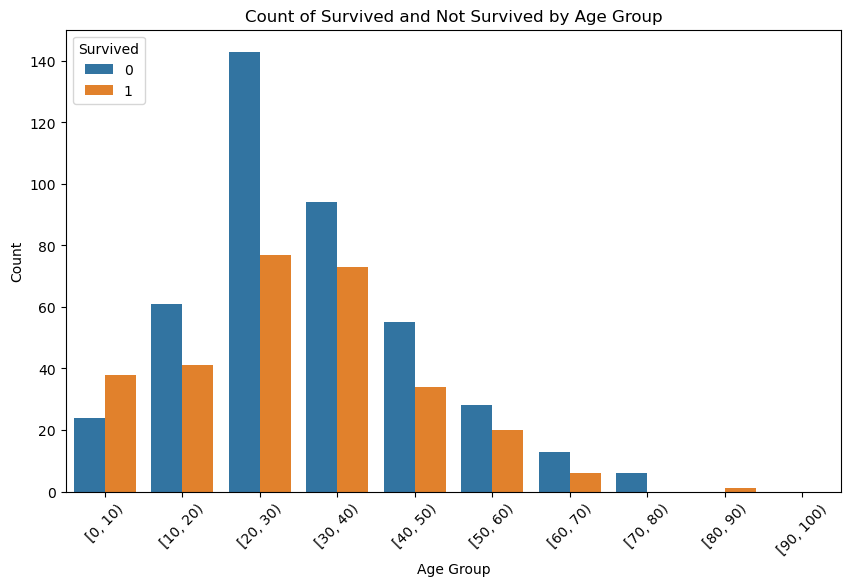

In [154]:
# sns.countplot(data=data, x='Age', hue='Survived')  # Important and Relevant feature
# sns.countplot(data=data, x="Pclass", hue="Survived") # Important feature but not the most important
# sns.countplot(data=data,x="Name", hue="Survived") # Not important feature

Age_Group= pd.cut(data['Age'], bins=range(0, 101, 10), right=False)
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x=Age_Group, hue='Survived')
plt.xticks(rotation=45)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Count of Survived and Not Survived by Age Group')
plt.show()
